# An Empirical Comparison of Supervised and Self-Supervised Learning

In [1]:
import tqdm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from sklearn.svm import SVC
from sklearn.manifold import TSNE

from train import train_encoder, train_ConvNet, TrainArgs
from test import encode_data, plot_tsne, test_conv

from torch.utils.data import Subset

In [2]:
%load_ext autoreload
%autoreload 2

## Baseline: convolutional neural network

In [33]:
conv_args = TrainArgs(batchsize = 10)

In [34]:
ConvNet, conv_losses = train_ConvNet(conv_args)

Files already downloaded and verified
[epoch: 0, i:   999] avg mini-batch loss: 2.295


KeyboardInterrupt: 

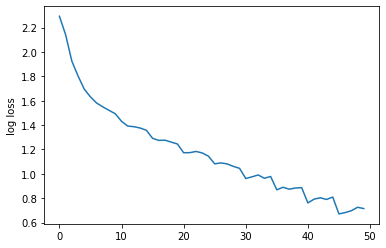

In [8]:
plt.plot(conv_losses);
plt.ylabel('log loss');

In [10]:
print(f'Baseline accuracy of the convolutional model is {test_conv(ConvNet)*100} %')

Files already downloaded and verified
Baseline accuracy of the convolutional model is 64.25999999999999 %


## Momentum Contrast

### Pre-Training the Encoder

In [3]:
encoder_args = TrainArgs(epochs = 20)

In [4]:
encoder, enc_losses = train_encoder(encoder_args)

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 	Loss: 0.032416
Train Epoch: 2 	Loss: 0.011225
Train Epoch: 3 	Loss: 0.006198
Train Epoch: 4 	Loss: 0.004634
Train Epoch: 5 	Loss: 0.003756
Train Epoch: 6 	Loss: 0.003326
Train Epoch: 7 	Loss: 0.003007
Train Epoch: 8 	Loss: 0.002817
Train Epoch: 9 	Loss: 0.002619
Train Epoch: 10 	Loss: 0.002489
Train Epoch: 11 	Loss: 0.002349
Train Epoch: 12 	Loss: 0.002275
Train Epoch: 13 	Loss: 0.002186
Train Epoch: 14 	Loss: 0.002100
Train Epoch: 15 	Loss: 0.001986
Train Epoch: 16 	Loss: 0.001958
Train Epoch: 17 	Loss: 0.001869
Train Epoch: 18 	Loss: 0.001841
Train Epoch: 19 	Loss: 0.001751
Train Epoch: 20 	Loss: 0.001713


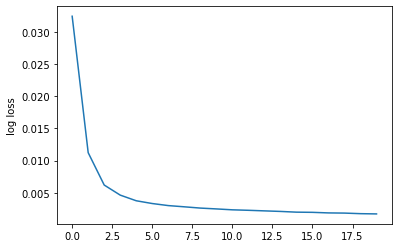

In [5]:
plt.plot(enc_losses);
plt.ylabel('log loss');

### Visualizing Embeddings

To do:
1. Implement multiple training ratios
2. Hyperparameter tuning?
3. Plot the loss functions

In [11]:
data, targets = encode_data()

Files already downloaded and verified


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:39<00:00, 45.48it/s]


In [13]:
ret = TSNE(n_components=2, random_state=0, n_jobs=8).fit_transform(data)

Files already downloaded and verified


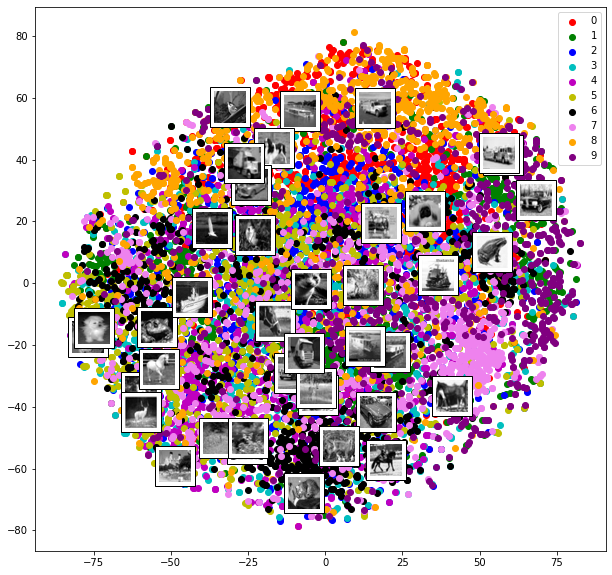

In [22]:
plot_tsne(targets, ret)

### Training SVM on freezed features

In [28]:
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified


 37%|████████████████████████████▌                                                 | 1834/5000 [00:38<01:06, 47.29it/s]


KeyboardInterrupt: 

In [20]:
svm = SVC(C = 100,  gamma='scale')
svm.fit(X_train, y_train)

0.6382

In [21]:
svm.score(X_test, y_test)

0.6382

### Multiple Runs

In [11]:
# subsample so things run faster
X_train, y_train = encode_data(train=True, subsample = True)
X_test, y_test = encode_data(train=False, subsample = True)

Files already downloaded and verified


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:52<00:00, 44.49it/s]


Files already downloaded and verified


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:21<00:00, 47.05it/s]


In [8]:
conv_args = TrainArgs(batchsize = 10, epochs = 5)

In [12]:
n = 3
conv_errors = []
svm_errors = []
for i in range(n):
    ConvNet, conv_losses = train_ConvNet(conv_args, subsample=True)
    conv_errors.append(test_conv(ConvNet, subsample=True)*100)
    
    svm = SVC(C = 100,  gamma='scale')
    svm.fit(X_train, y_train)   
    svm_errors.append(svm.score(X_test, y_test))

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.298
[epoch: 2, i:   499] avg mini-batch loss: 2.285
[epoch: 3, i:   499] avg mini-batch loss: 2.209
[epoch: 4, i:   499] avg mini-batch loss: 2.028
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.301
[epoch: 1, i:   499] avg mini-batch loss: 2.296
[epoch: 2, i:   499] avg mini-batch loss: 2.281
[epoch: 3, i:   499] avg mini-batch loss: 2.225
[epoch: 4, i:   499] avg mini-batch loss: 2.088
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.299
[epoch: 2, i:   499] avg mini-batch loss: 2.293
[epoch: 3, i:   499] avg mini-batch loss: 2.277
[epoch: 4, i:   499] avg mini-batch loss: 2.241
Files already downloaded and verified


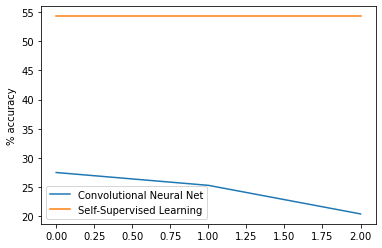

In [28]:
plt.plot(np.array(conv_errors), label="Convolutional Neural Net")
plt.plot(np.array(svm_errors)*100, label="Self-Supervised Learning")
plt.legend()
plt.ylabel('% accuracy')
plt.savefig('./results/comparison.png')

In [20]:
conv_errors

[27.500000000000004, 25.3, 20.4]

In [22]:
svm_errors

[0.543, 0.543, 0.543]

In [17]:
conv_errors

[27.500000000000004, 25.3, 20.4]